In [6]:
#!pip install missingno

In [119]:
# Import Dependencies
%matplotlib inline

# Data Manipulation
import numpy as np
import pandas as pd

# Visualization 
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')


In [8]:
pwd

'C:\\Users\\RobertoMegumi'

In [9]:
train = pd.read_csv('C:/Users/RobertoMegumi/Documents/data/Titanic/train.csv')
test = pd.read_csv('C:/Users/RobertoMegumi/Documents/data/Titanic/test.csv')
gender_submission = pd.read_csv('C:/Users/RobertoMegumi/Documents/data/Titanic/gender_submission.csv')

In [10]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [12]:
len(train)

891

In [13]:
len(test)

418

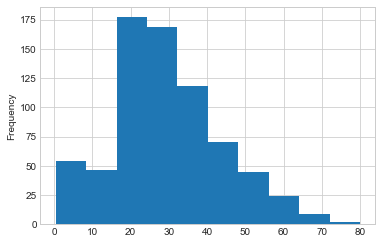

In [14]:
train.Age.plot.hist()

In [15]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


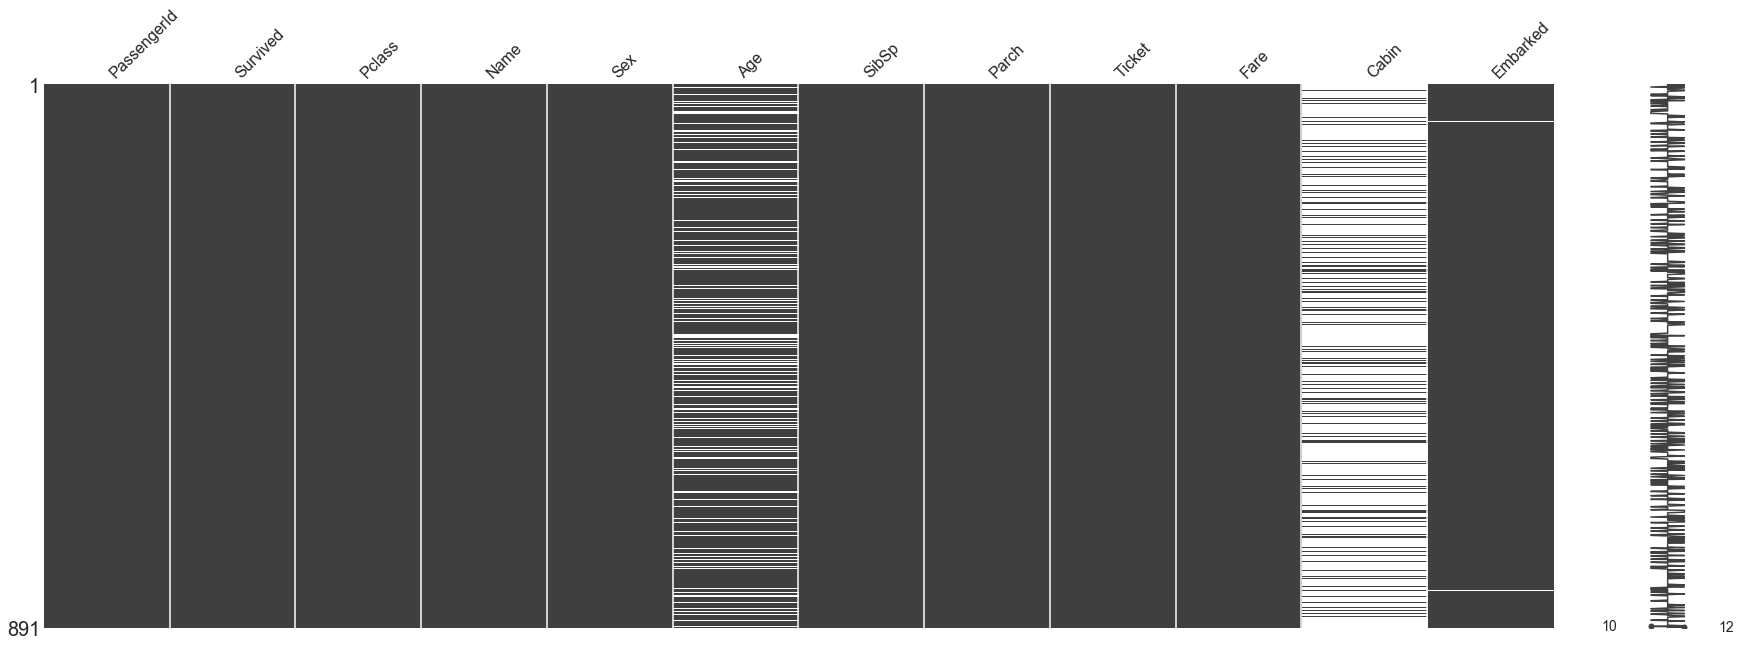

In [16]:
missingno.matrix(train, figsize = (30,10))

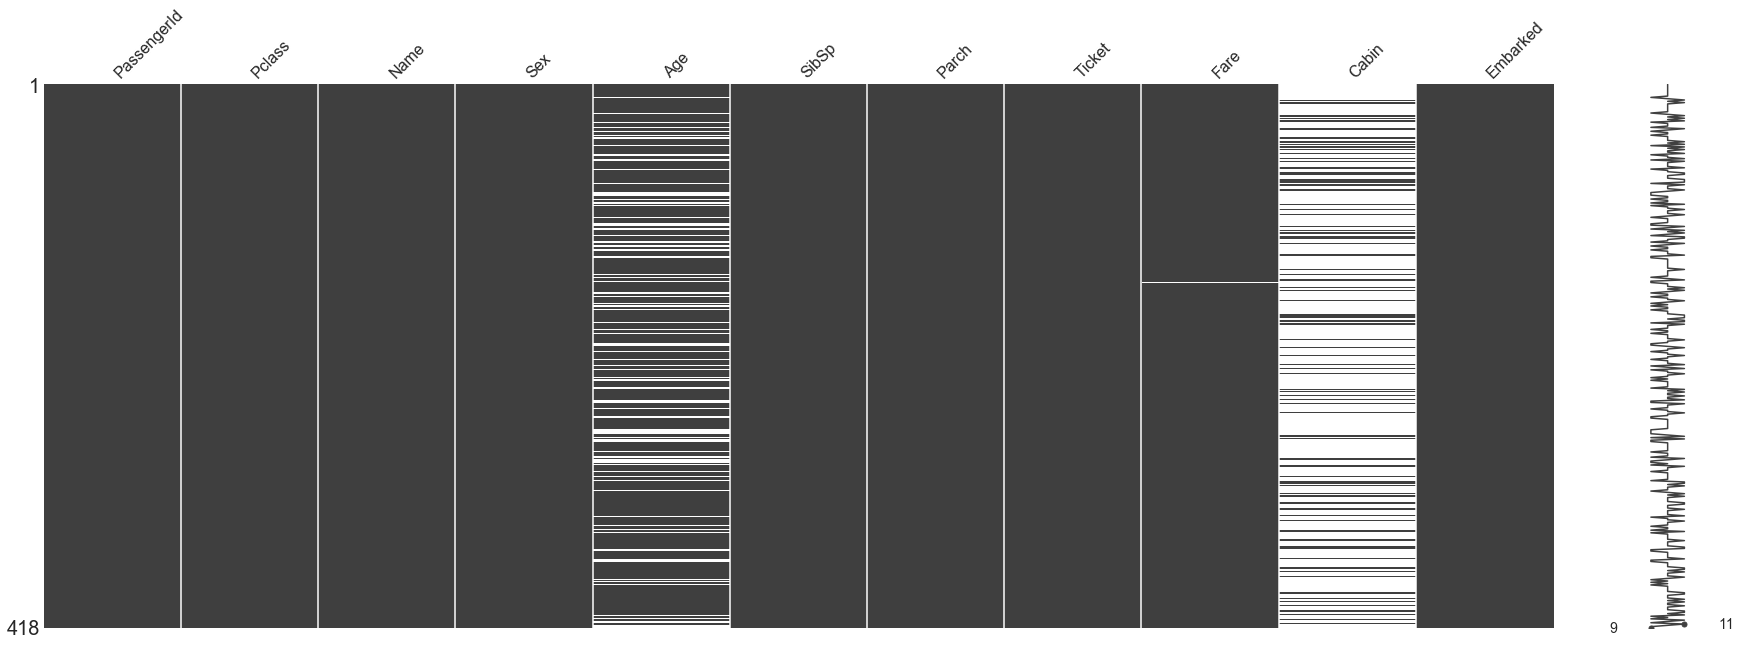

In [17]:
missingno.matrix(test, figsize = (30,10))

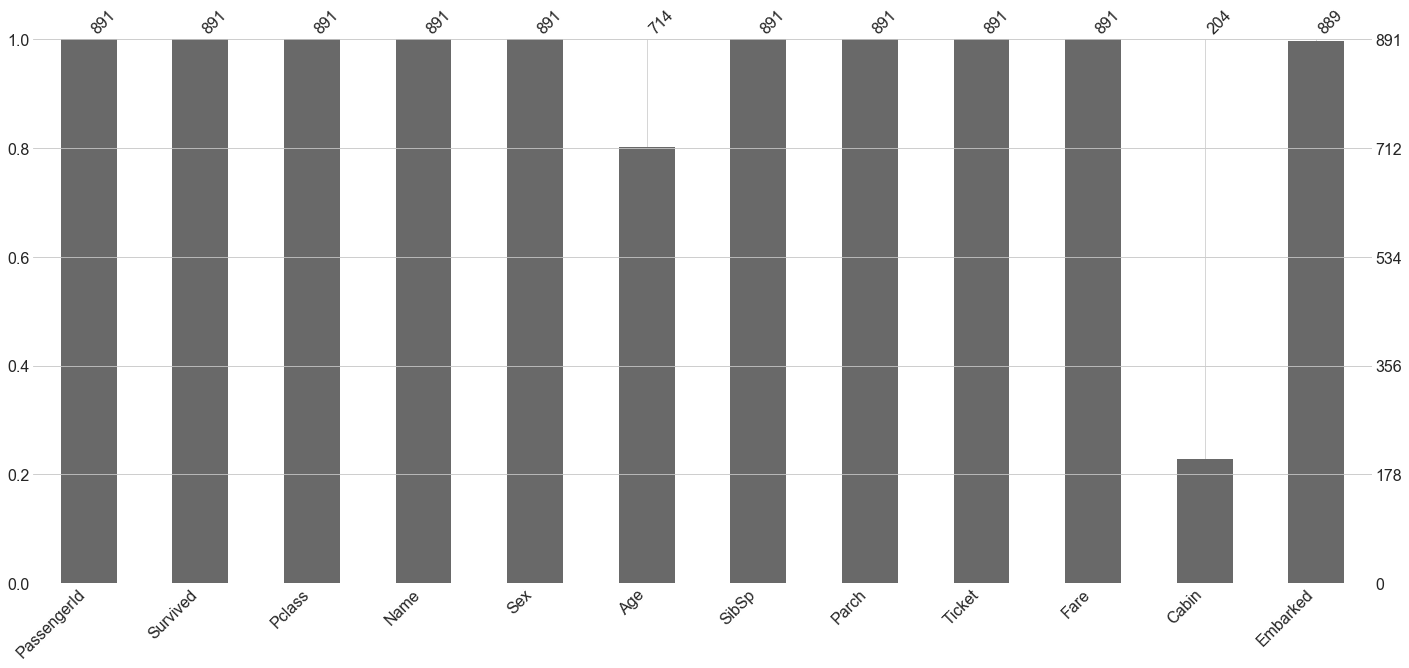

In [18]:
missingno.bar(train.sample(891))

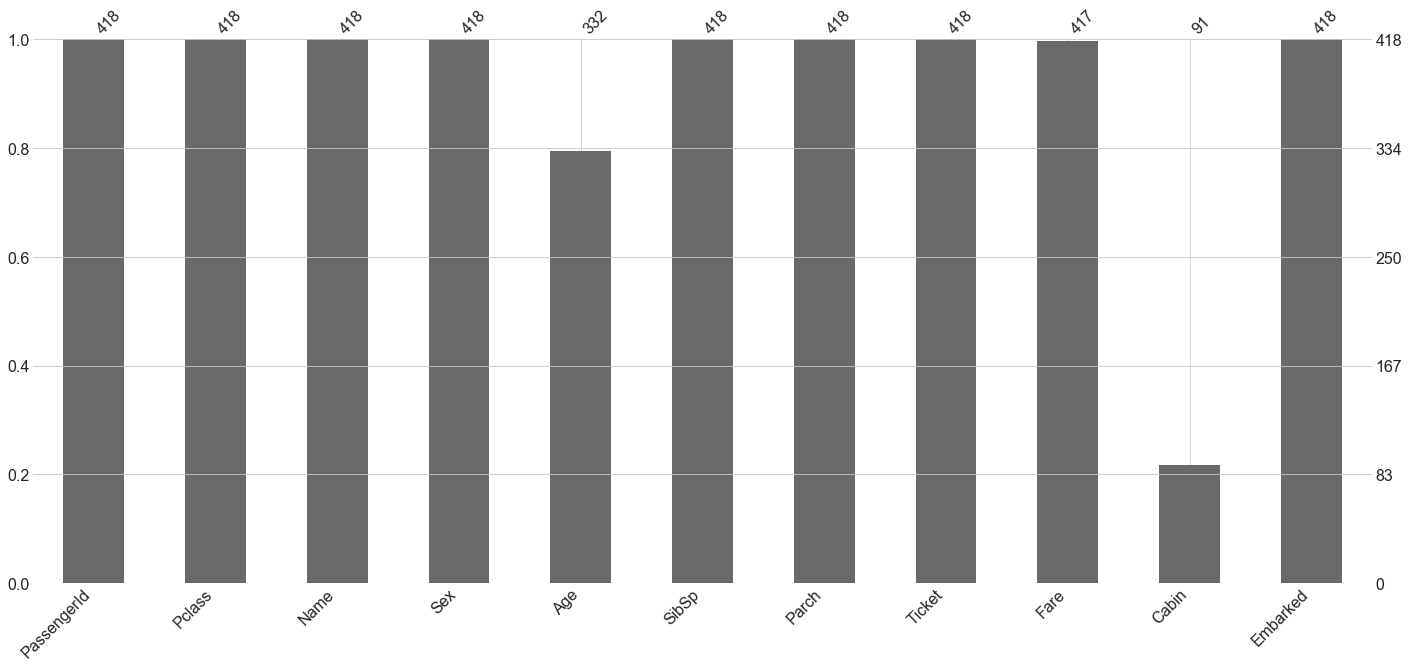

In [19]:
missingno.bar(test.sample(418))

In [20]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

0    549
1    342
Name: Survived, dtype: int64


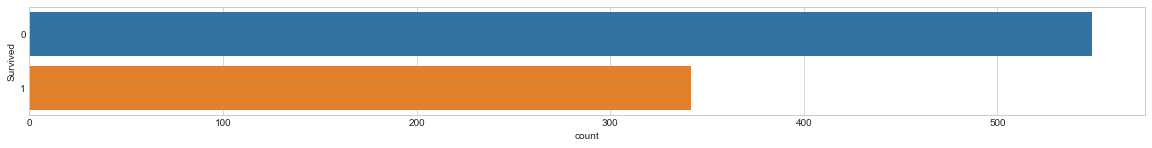

In [21]:
fig = plt.figure(figsize=(20,2))
sns.countplot(y='Survived', data=train)
print(train.Survived.value_counts())

In [22]:
df_bin = pd.DataFrame() # for discretised continuous variables
df_con = pd.DataFrame() # for continuous variables

In [23]:
df_bin['Survived'] = train['Survived']
df_con['Survived'] = train['Survived']

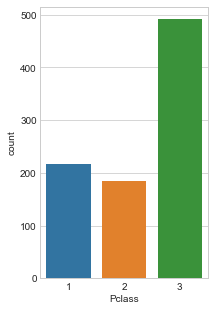

In [24]:
fig = plt.figure(figsize=(3, 5))
sns.countplot(train.Pclass)

In [25]:
df_bin['Pclass'] = train['Pclass']
df_con['Pclass'] = train['Pclass']

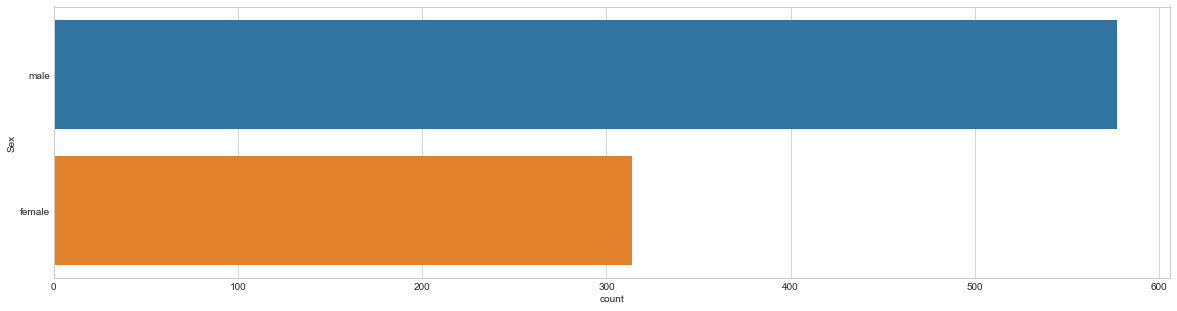

In [26]:
plt.figure(figsize=(20, 5))
sns.countplot(y="Sex", data=train)

In [27]:
df_bin['Sex'] = train['Sex']
df_bin['Sex'] = np.where(df_bin['Sex'] == 'female', 1, 0)
df_con['Sex'] = train['Sex']

In [28]:
df_bin.head()

,Survived,Pclass,Sex
0,0,3,0
1,1,1,1
2,1,3,1
3,1,1,1
4,0,3,0


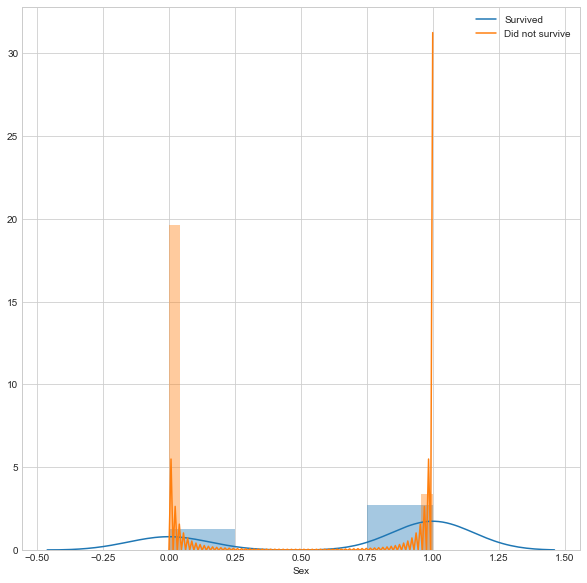

In [29]:
fig = plt.figure(figsize=(10, 10))
sns.distplot(df_bin.loc[df_bin['Survived'] == 1]['Sex'], kde_kws={'label': 'Survived'})
sns.distplot(df_bin.loc[df_bin['Survived'] == 0]['Sex'], kde_kws={'label': 'Did not survive'})

In [30]:
train.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [31]:
df_bin['SibSp'] = train['SibSp']
df_con['SibSp'] = train['SibSp']

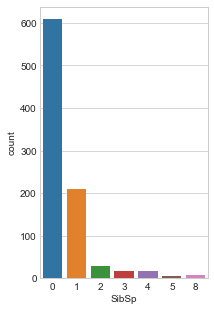

In [32]:
fig = plt.figure(figsize=(3, 5))
sns.countplot(train.SibSp)

In [33]:
len(train[(train.Survived == 0) & (train.SibSp == 0)])

398

In [34]:
len(train[(train.Survived == 0) & (train.SibSp == 1)])

97

In [35]:
train.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

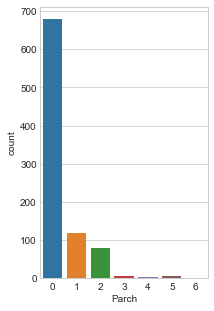

In [36]:
fig = plt.figure(figsize=(3, 5))
sns.countplot(train.Parch)

In [37]:
df_bin['Parch'] = train['Parch']
df_con['Parch'] = train['Parch']

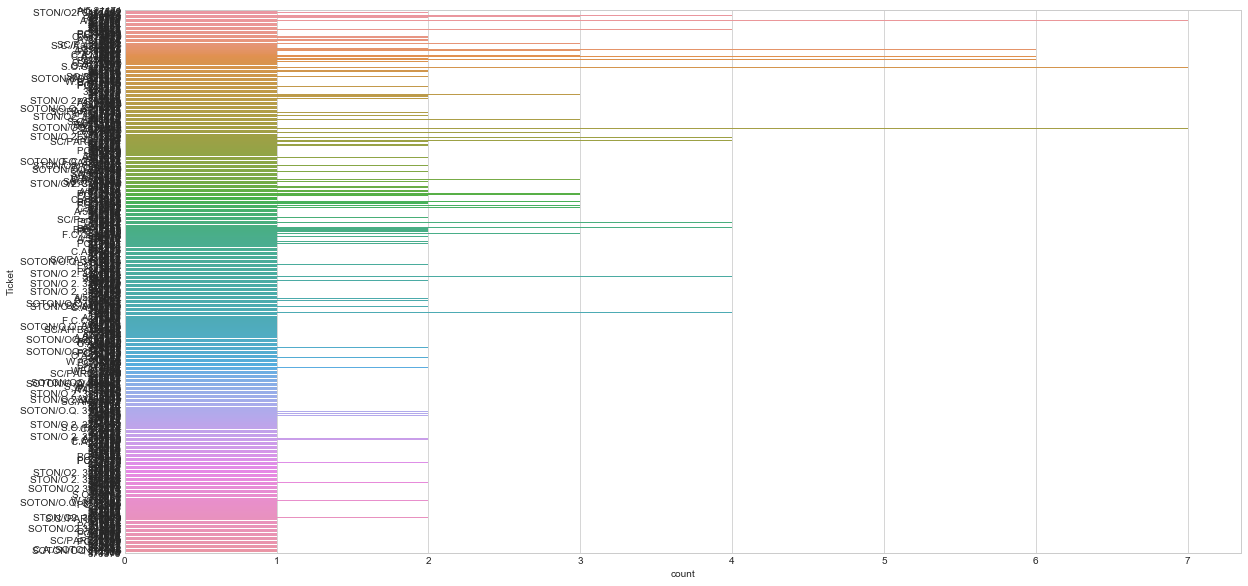

In [38]:
fig = plt.figure(figsize=(20, 10))
sns.countplot(y="Ticket", data=train);

In [39]:
train.Ticket.value_counts()

CA. 2343             7
347082               7
1601                 7
CA 2144              6
347088               6
3101295              6
382652               5
S.O.C. 14879         5
W./C. 6608           4
2666                 4
347077               4
LINE                 4
17421                4
113781               4
19950                4
4133                 4
PC 17757             4
349909               4
113760               4
PC 17755             3
110413               3
PC 17572             3
110152               3
13502                3
PC 17760             3
371110               3
PC 17582             3
SC/Paris 2123        3
239853               3
248727               3
                    ..
312993               1
A/5 3536             1
PC 17475             1
237798               1
315096               1
343120               1
373450               1
349245               1
113051               1
349257               1
350048               1
12233                1
C.A. 29178 

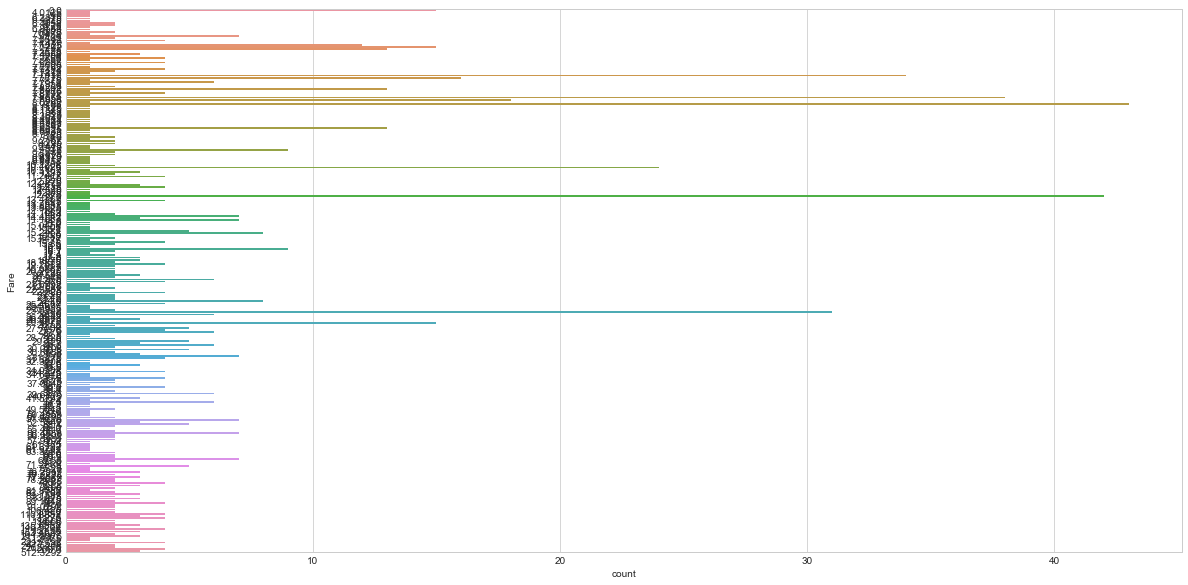

In [40]:
fig = plt.figure(figsize=(20, 10))
sns.countplot(y="Fare", data=train)

In [41]:
df_con['Fare'] = train['Fare'] 
df_bin['Fare'] = pd.cut(train['Fare'], bins=4)

In [42]:
df_bin.Fare.value_counts()

(-0.512, 128.082]     853
(128.082, 256.165]     29
(256.165, 384.247]      6
(384.247, 512.329]      3
Name: Fare, dtype: int64

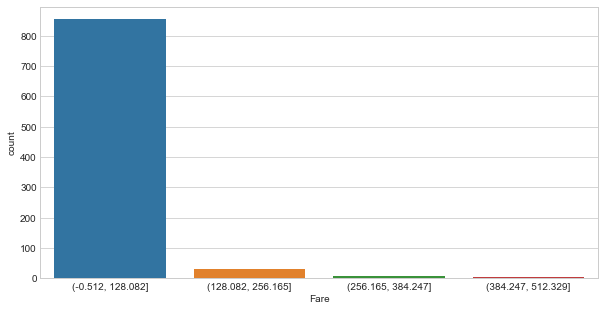

In [43]:
fig = plt.figure(figsize=(10, 5))
sns.countplot(df_bin.Fare)

In [44]:
train.Cabin.isnull().sum()

687

In [45]:
train.Cabin.value_counts()

B96 B98            4
G6                 4
C23 C25 C27        4
F2                 3
C22 C26            3
E101               3
F33                3
D                  3
C83                2
D26                2
C2                 2
C78                2
C126               2
B77                2
B57 B59 B63 B66    2
B49                2
D17                2
B28                2
D36                2
E121               2
D20                2
E24                2
B58 B60            2
E67                2
B18                2
C124               2
D35                2
E33                2
D33                2
E25                2
                  ..
B3                 1
B78                1
B30                1
C99                1
D49                1
F E69              1
C128               1
C118               1
C106               1
D28                1
C30                1
C91                1
D48                1
E36                1
C85                1
C54                1
A31          

In [46]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

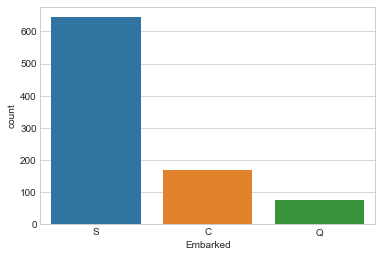

In [47]:
sns.countplot(train.Embarked)

In [48]:
df_bin['Embarked'] = train['Embarked']
df_con['Embarked'] = train['Embarked']

In [49]:
print(len(df_con))
df_con = df_con.dropna(subset=['Embarked'])
df_bin = df_bin.dropna(subset=['Embarked'])
print(len(df_con))

891
889


**Encoding**



In [50]:
df_bin.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,0,1,0,"(-0.512, 128.082]",S
1,1,1,1,1,0,"(-0.512, 128.082]",C
2,1,3,1,0,0,"(-0.512, 128.082]",S
3,1,1,1,1,0,"(-0.512, 128.082]",S
4,0,3,0,0,0,"(-0.512, 128.082]",S


In [51]:
df_con.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,male,1,0,7.2500,S
1,1,1,female,1,0,71.2833,C
2,1,3,female,0,0,7.9250,S
3,1,1,female,1,0,53.1000,S
4,0,3,male,0,0,8.0500,S


In [52]:
one_hot_cols = df_bin.columns.tolist()
df_bin_enc = pd.get_dummies(df_bin, columns=one_hot_cols)

df_bin_enc.head()

,Survived_0,Survived_1,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1,SibSp_0,SibSp_1,SibSp_2,...,Parch_4,Parch_5,Parch_6,"Fare_(-0.512, 128.082]","Fare_(128.082, 256.165]","Fare_(256.165, 384.247]","Fare_(384.247, 512.329]",Embarked_C,Embarked_Q,Embarked_S
0,1,0,0,0,1,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,1,1,0,0,0,1,0,1,0,...,0,0,0,1,0,0,0,1,0,0
2,0,1,0,0,1,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,1
3,0,1,1,0,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,1
4,1,0,0,0,1,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1


One hot encoder
.tolist()
Get dummies

In [53]:
df_embarked_one_hot = pd.get_dummies(df_con['Embarked'], 
                                     prefix='embarked')

df_sex_one_hot = pd.get_dummies(df_con['Sex'], 
                                prefix='sex')

df_plcass_one_hot = pd.get_dummies(df_con['Pclass'], 
                                   prefix='pclass')

In [54]:
df_con_enc = pd.concat([df_con, 
                        df_embarked_one_hot, 
                        df_sex_one_hot, 
                        df_plcass_one_hot], axis=1)

df_con_enc = df_con_enc.drop(['Pclass', 'Sex', 'Embarked'], axis=1)

#df_con_enc vai ser a união de df_embarked_one_hot, df_sex_one_hot e df_plcass_one_hot, cda um com seus respectivos dummies.
#O .drop vai remover a repetição. As colunas Survived, SibSp, Parch e Fare já estão no formato que queremos.

In [55]:
df_con_enc.head(20)

,Survived,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,1,0,71.2833,1,0,0,1,0,1,0,0
2,1,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,1,0,53.1000,0,0,1,1,0,1,0,0
4,0,0,0,8.0500,0,0,1,0,1,0,0,1
5,0,0,0,8.4583,0,1,0,0,1,0,0,1
6,0,0,0,51.8625,0,0,1,0,1,1,0,0
7,0,3,1,21.0750,0,0,1,0,1,0,0,1
8,1,0,2,11.1333,0,0,1,1,0,0,0,1
9,1,1,0,30.0708,1,0,0,1,0,0,1,0


In [56]:
selected_df = df_con_enc
X = selected_df.drop('Survived', axis=1) # data
y = selected_df.Survived # labels

#separando o dataframe em dois.

In [57]:
X.head()

#Sem a coluna Survived. Data

,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,0,71.2833,1,0,0,1,0,1,0,0
2,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,0,53.1000,0,0,1,1,0,1,0,0
4,0,0,8.0500,0,0,1,0,1,0,0,1


In [58]:
y.head()

#Só com a coluna Survived. Labels

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

**Regressão Logística**

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train.shape, y_train.shape

((711, 11), (711,))

In [60]:
X_test.shape, y_test.shape

((178, 11), (178,))

In [98]:
model1 = LogisticRegression()

In [99]:
model1.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [100]:
y_pred = model1.predict(X_train)

In [101]:
y_pred[0:5]

array([0, 1, 0, 0, 0], dtype=int64)

In [102]:
model1.score(X_train,y_train)

0.8171589310829818

In [103]:
cross_val_score(model1, X, y, cv = 10).mean()

0.7941394279877427

**KNN**

In [104]:
model2 = KNeighborsClassifier()

In [107]:
model2.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [109]:
model2.score(X_train, y_train)

0.8410689170182841

In [110]:
cross_val_score(model2, X, y, cv = 10).mean()

0.7671603677221654

**Decision Tree**

In [120]:
model3 = DecisionTreeClassifier()

In [121]:
model3.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [122]:
model3.score(X_train, y_train)

0.929676511954993

In [123]:
cross_val_score(model3, X, y, cv = 10).mean()

0.8020173646578141

# Submit

In [67]:
X_train.head()

,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
34,1,0,82.1708,1,0,0,0,1,1,0,0
230,1,0,83.4750,0,0,1,1,0,1,0,0
420,0,0,7.8958,1,0,0,0,1,0,0,1
116,0,0,7.7500,0,1,0,0,1,0,0,1
207,0,0,18.7875,1,0,0,0,1,0,0,1


In [68]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [69]:
test_embarked_one_hot = pd.get_dummies(test['Embarked'], 
                                       prefix='embarked')

test_sex_one_hot = pd.get_dummies(test['Sex'], 
                                prefix='sex')

test_plcass_one_hot = pd.get_dummies(test['Pclass'], 
                                   prefix='pclass')

In [70]:
test = pd.concat([test, 
                  test_embarked_one_hot, 
                  test_sex_one_hot, 
                  test_plcass_one_hot], axis=1)

In [71]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,1,0,0,1,0,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0,1,1,0,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,1,0,0,1,0,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0,1,0,1,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,0,1,1,0,0,0,1


In [72]:
wanted_test_columns = X_train.columns
wanted_test_columns

Index(['SibSp', 'Parch', 'Fare', 'embarked_C', 'embarked_Q', 'embarked_S',
       'sex_female', 'sex_male', 'pclass_1', 'pclass_2', 'pclass_3'],
      dtype='object')

In [73]:
test[wanted_test_columns].head()

,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,0,0,7.8292,0,1,0,0,1,0,0,1
1,1,0,7.0000,0,0,1,1,0,0,0,1
2,0,0,9.6875,0,1,0,0,1,0,1,0
3,0,0,8.6625,0,0,1,0,1,0,0,1
4,1,1,12.2875,0,0,1,1,0,0,0,1


In [74]:
X_train.head()

,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
34,1,0,82.1708,1,0,0,0,1,1,0,0
230,1,0,83.4750,0,0,1,1,0,1,0,0
420,0,0,7.8958,1,0,0,0,1,0,0,1
116,0,0,7.7500,0,1,0,0,1,0,0,1
207,0,0,18.7875,1,0,0,0,1,0,0,1


In [76]:
np.where(np.isnan(test.Fare))

(array([152], dtype=int64),)

In [77]:
test.Fare[151:153]

151    7.8958
152       NaN
Name: Fare, dtype: float64

In [78]:
test.Fare.mean()

35.6271884892086

In [79]:
test = test.fillna(test.Fare.mean())
#If you have a very small amount of missing data then substituting the mean or median will do no significant harm in most cases.

In [80]:
np.where(np.isnan(test.Fare))

(array([], dtype=int64),)

In [137]:
len(test)

418

In [138]:
predictions = model3.predict(test[wanted_test_columns])

In [139]:
predictions[0:10]

array([0, 1, 0, 0, 1, 0, 0, 0, 1, 0], dtype=int64)

In [140]:
submission = pd.DataFrame()
submission['PassengerId'] = test['PassengerId']
submission['Survived'] = predictions # our model predictions on the test dataset
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [141]:
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [142]:
submission['Survived'] = submission['Survived'].astype(int)

In [143]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [144]:
len(submission)

418

In [145]:
len(test)

418

In [146]:
#submission.to_csv("C:/Users/RobertoMegumi/Documents/data/Titanic/ML_titanic.csv", index=False)